In [1]:
import pandas as pd
import altair as alt

from IPython.display import Markdown

_ = alt.renderers.set_embed_options(theme="ggplot2", actions=False)


In [2]:
%load_ext sql
%config SqlMagic.displaycon = False
%sql --connection_arguments '{"read_only": true}'

In [11]:
%%sql 
select * from filecoin_state_market_deals
limit 10

deal_id,piece_cid,piece_size,is_verified,client_id,provider_id,label,start_epoch,start_at,end_epoch,end_at,storage_price_per_epoch,provider_collateral,client_collateral,sector_start_epoch,sector_start_at,last_updated_epoch,last_updated_at,slash_epoch,slashed_at,verified_claim
159155,baga6ea4seaqaazz4brpn3zde6dkorq3muck42qzw5hetx7wtwm6oyz4lqdklcpa,65536,False,f020319,f016305,mAXESINiz1A6zzmVo8QoU7wKbP+gB3PGSyA43a4ZukzHIxc3z,1281643200,3239-01-21 22:00:00,1282165340,3239-07-22 05:10:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159170,baga6ea4seaqaazz4brpn3zde6dkorq3muck42qzw5hetx7wtwm6oyz4lqdklcpa,65536,False,f020319,f016305,mAXESINiz1A6zzmVo8QoU7wKbP+gB3PGSyA43a4ZukzHIxc3z,1282046400,3239-06-10 22:00:00,1282568540,3239-12-09 05:10:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159181,baga6ea4seaqaazz4brpn3zde6dkorq3muck42qzw5hetx7wtwm6oyz4lqdklcpa,65536,False,f020319,f016309,mAXESINiz1A6zzmVo8QoU7wKbP+gB3PGSyA43a4ZukzHIxc3z,1282608000,3239-12-22 22:00:00,1283129618,3240-06-21 00:49:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159183,baga6ea4seaqcjw5o3bbrn6u2tgv7j7lihxufsm4c3zijhznymvpjfmlckbuccaq,1048576,False,f020319,f016305,mAXESIN6mq1OV8vx3Wq/vL7IaZX5f+bmEIatiFHnvR4ZNhLVr,1282608000,3239-12-22 22:00:00,1283130140,3240-06-21 05:10:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159188,baga6ea4seaqkkyehwbcfh6l72e2jrooyqvbbr6f2xdyobesu6aupjfrox7tc2ki,4096,False,f020319,f016304,mAXESIOBDGaYV/UAiPSsJZDXHqoU4SYqq7nJ0/tagst+ls8d9,1282680000,3240-01-16 22:00:00,1283202204,3240-07-16 05:42:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159189,baga6ea4seaqojxopcje7y4biwj3qs2xt3srmcill6uvmga6gfqcppcutqs3g6my,4096,False,f020319,f016305,mAXESIAjeNqjrNMiI9wdUEG54r2AaDGf1WfvfXjuutGQ/esch,1282680000,3240-01-16 22:00:00,1283202140,3240-07-16 05:10:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159190,baga6ea4seaqpg2hxv5os6bygcipqks537txiaojypb6ilzsu5qmp7bw2dptwcei,4096,False,f020319,f016303,mAXESIKtGtBrFsswfb5KZRnLb06BxpxE2ZJiuTQjWwUEy4dT5,1282680000,3240-01-16 22:00:00,1283204137,3240-07-16 21:48:30,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159191,baga6ea4seaqoxyynqy3cbeutvbiygtlk6jw6wc4cpolguq65ebgrby4tcyjbgci,4096,False,f020319,f016309,mAXESIFcZ1jlnoL7/DPtkuvcTlV0aYMyeLo5YL5ivYcTLf+lj,1282680000,3240-01-16 22:00:00,1283201618,3240-07-16 00:49:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159192,baga6ea4seaqgxbzhjoaxjpzcqozmb6nznm6y452okpmp6adqmn6p4bz6w5ugaoq,4096,False,f020319,f016303,mAXESIFvyl9nFfaMUEQ2XoY8SDTnhpybAFU/hcn98nkyQnVl6,1282680000,3240-01-16 22:00:00,1283204137,3240-07-16 21:48:30,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0
159193,baga6ea4seaqkwr7zajmbufki6sgx2f3cqcjbq3bh4is4u3j6tlv2crfyyiyjykq,8192,False,f020319,f016309,mAXESIHyfVbyMVkTSYC2mCSewpvokw5I8LEBwQuwEvTsvAios,1282694400,3240-01-21 22:00:00,1283216018,3240-07-21 00:49:00,0,0,0,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,-1,2020-08-24 21:59:30,0


In [17]:
%%sql 
select 
    piece_cid, 
    count(*) as c,
    min(sector_start_at) as min_sector_start_at,
    max(sector_start_at) as max_sector_start_at,
    max(slash_epoch) as max_slash_epoch,
    min(slash_epoch) as min_slash_epoch
from filecoin_state_market_deals
group by 1
order by 2 desc 
limit 10

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

piece_cid,c,min_sector_start_at,max_sector_start_at,max_slash_epoch,min_slash_epoch
baga6ea4seaqof356aeq4mvurh43yir2z6j3wguczeke4dy4lngbb7fwrmfpjydy,10420,2022-04-18 00:05:00,2022-04-27 12:51:00,-1,-1
baga6ea4seaqnvexhndom5ipydpn42c3va2jhuepv4bc7rwrc33t3x7gqkn53ugi,8640,2022-04-11 22:13:30,2022-04-21 07:56:30,-1,-1
baga6ea4seaqma3d2foqh3obhlxca2z4emobsarysx5pyrygroakuyxyd7sjzmby,6519,2022-07-14 05:56:30,2023-01-11 20:43:30,2936757,-1
baga6ea4seaqfecaafawnex4i4z3dlpv5ngaxp5sa5spgf77mz3s3lvfidqom2da,636,2022-04-30 14:08:00,2022-06-29 03:33:30,-1,-1
baga6ea4seaqootvvm3rolzm7o4cdbshrgs4ceoe5rdwi6j6q52gmmkgtppwiogq,631,2022-08-01 10:47:30,2022-10-21 02:15:00,-1,-1
baga6ea4seaqpc6o5flzyg2ujmzdoydpjzkctembxk6mrfa6td3dzfcptbed4qkq,618,2022-04-30 14:08:00,2022-06-28 22:09:00,-1,-1
baga6ea4seaqmjgc2dhqsggctzwx5i2msscsdc5v27lva2tvanmd4j2pq27n2yaq,606,2022-06-23 22:48:30,2022-12-15 07:43:30,-1,-1
baga6ea4seaqdpednuhl5eukv7ym7lnxg66k3qzf5tf33h5uovhrkvwmlrpg24fa,596,2022-06-23 23:51:00,2022-12-15 08:37:30,-1,-1
baga6ea4seaqgshsnocaigqcar5frhf4f5xfvprumbzjjci2xofktnef6utiuyoa,595,2022-06-23 23:35:30,2022-12-15 07:39:30,-1,-1
baga6ea4seaqdorw3mefmpaabi7tx7rxu7qxmqdxkpeyyqg3myiq72pwfk6qzedq,594,2022-06-24 01:20:00,2022-12-15 13:33:00,-1,-1


In [42]:
%%sql 
select 
    label, 
    count(*) as c,
    min(sector_start_at) as min_sector_start_at,
    max(sector_start_at) as max_sector_start_at,
    max(slash_epoch) as max_slash_epoch,
    min(slash_epoch) as min_slash_epoch
from filecoin_state_market_deals
group by 1
order by 2 desc 
limit 10

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

label,c,min_sector_start_at,max_sector_start_at,max_slash_epoch,min_slash_epoch
,87412,2022-07-29 14:20:30,2023-03-27 05:25:00,-1,-1
mAXCg5AIgIJ8HTQAyb6YrBhVbjNFPUpxuuKFwka7e/mTrZO//Mkc,10420,2022-04-18 00:05:00,2022-04-27 12:51:00,-1,-1
mAXCg5AIg5EZls9sEsfwaosgZqVSK5PvFkQnJdM2wGJSt/EYm0AA,8640,2022-04-11 22:13:30,2022-04-21 07:56:30,-1,-1
mAXASINnX7B9uSxAYyJ56G53uC9DL9KBWluLyTvUuZBW5lqKW,6519,2022-07-14 05:56:30,2023-01-11 20:43:30,2936757,-1
seal-the-delta-deal,636,2023-02-24 05:21:00,2023-02-25 17:43:30,-1,-1
mAXCg5AIg+M2LOiMWwaIryh23VIZoN9X6Gy2U+fCy8gphNPJi/Wg,636,2022-04-30 14:08:00,2022-06-29 03:33:30,-1,-1
uAXCg5AIguiKar1RfFeawnPDaNJjkEdsY8-K17uAcZeoL5CYNXJU,631,2022-08-01 10:47:30,2022-10-21 02:15:00,-1,-1
mAXCg5AIg/38SC8nwRMNj1twz4JLNRpt24qNid/5jpt8zy/2zG0s,618,2022-04-30 14:08:00,2022-06-28 22:09:00,-1,-1
mAXCg5AIg+anthUlT2gYa+cT4YQA7WYfZs4hu5weNgT8bMDQZwgY,606,2022-06-23 22:48:30,2022-12-15 07:43:30,-1,-1
mAXCg5AIgrI/v+0UPRQpiMJjXQVtC4GqApaA7I1vxV74ATd8f/mE,596,2022-06-23 23:51:00,2022-12-15 08:37:30,-1,-1


In [39]:
%%sql dt <<
select
    date_trunc('day', sector_start_at) as date,
    count(distinct provider_id) as providers,
    count(distinct client_id) as clients
from filecoin_state_market_deals
where 
    sector_start_epoch > 0 and slash_epoch = -1
    and sector_start_at < current_date
group by 1
order by 1 desc


<Axes: xlabel='date'>

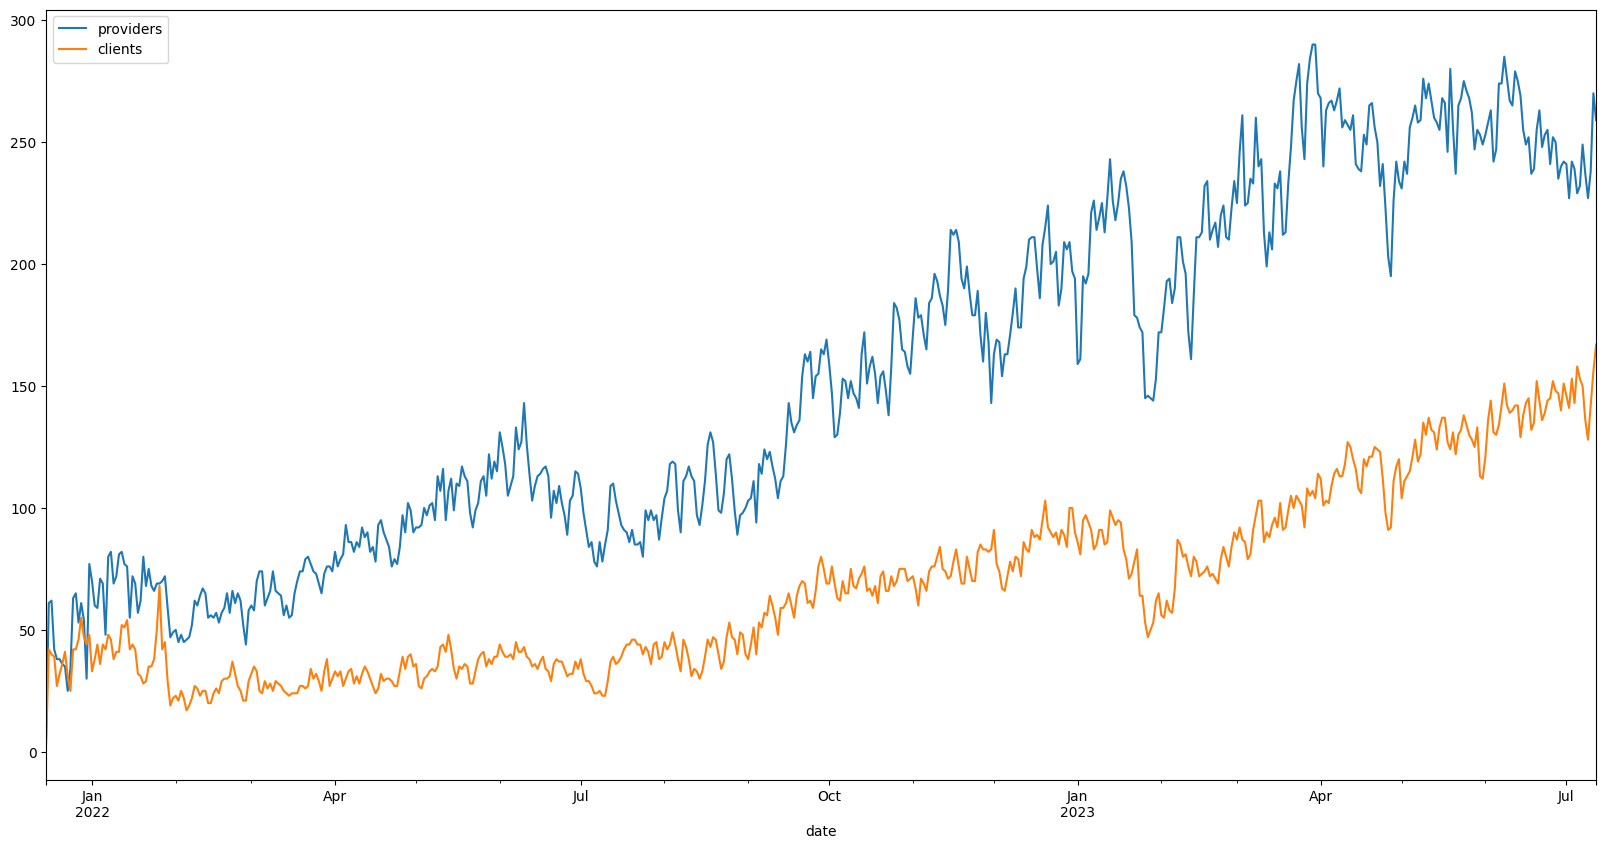

In [40]:
d = dt.DataFrame()
d["date"] = pd.to_datetime(d["date"])
d.plot(x="date", figsize=(20, 10))


In [3]:
%%sql daily_data_on_chain <<
select
    date_trunc('day', sector_start_at) as date,
    sum(piece_size / 1024 ** 5) as onboarded_tibs
from filecoin_state_market_deals
where 
    sector_start_epoch > 0 and slash_epoch = -1
    and sector_start_at < current_date
group by 1
order by 1


In [31]:
df = daily_data_on_chain.DataFrame()
df["date"] = pd.to_datetime(df["date"])


In [32]:
# Altair chart of daily data on chain

c = (
    alt.Chart(df)
    .mark_area()
    .encode(
        x=alt.X("date:T", title="Date"),
        y=alt.Y("onboarded_tibs:Q", title="Onboarded TiBs"),
        color=alt.value("#55595c"),
        tooltip=["date:T", "onboarded_tibs:Q"],
    )
    .properties(
        width="container",
        height=400,
        title="Data Onboarding Rate",
    )
)

# Make it zoomable and lock the y axis
c = c.interactive(bind_y=False)

c.display()


alt.Chart(...)

In [33]:
# Now cumulative data on chain

df["cumulative_data"] = df["onboarded_tibs"].cumsum()

alt.Chart(df).mark_area().encode(
    x=alt.X("date:T", title="Date"),
    y=alt.Y("cumulative_data:Q", title="Cumulative data on chain (PiB)"),
    color=alt.value("#55595c"),
    tooltip=["date:T", "cumulative_data:Q"],
).properties(
    width="container",
    height=400,
    title="Cumulative data on chain",
)


alt.Chart(...)

In [35]:
# Gwoth rate of onboarded_tibs (7 day rolling average)

df["growth_rate"] = df["onboarded_tibs"].pct_change(periods=7).rolling(7).mean() * 100
recent_df = df[df["date"] > "2023-01-01"]

alt.Chart(recent_df).mark_bar().encode(
    x=alt.X("date:T", title="Date"),
    y=alt.Y("growth_rate:Q", title="Growth rate"),
    color=alt.value("#55595c"),
    tooltip=["date:T", "growth_rate:Q"],
).properties(
    width="container",
    height=400,
    title="Growth rate of onboarded data (7 day rolling average) in 2023",
)


alt.Chart(...)

In [38]:
df["delta"] = df["onboarded_tibs"].diff()

# Color negative values red
alt.Chart(df).mark_bar().encode(
    x=alt.X("date:T", title="Date"),
    y=alt.Y("delta:Q", title="Daily delta"),
    color=alt.condition(
        alt.datum.delta > 0,
        alt.value("#55595c"),  # The positive color
        alt.value("#ef5350"),  # The negative color
    ),
    tooltip=["date:T", "delta:Q"],
).properties(
    width="container",
    height=400,
    title="Daily delta of onboarded data",
).interactive(
    bind_y=False
)


alt.Chart(...)